# Trajectory inference of PB-LN recirculation with PAGA

Here, we will use [PAGA]() to predict the trajectory associated with the recirculation of CLL cells between peripheral blood (PB) and lymph node (LN) compartments.

## Preprocessing

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scanpy as sc
import loompy

### Read data

In [2]:
adata = sc.read_loom("../results/R_objects/seurat_12_trajectory.loom")

In [3]:
adata.obs.head()

,Exclude_FN,G2M.Score,Phase,RNA_snn_res.0.1,RNA_snn_res.0.25,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,S.Score,UMAP_1,...,sample_description_FN,sample_id,sampling_time,scrublet_doublet_scores,scrublet_doublet_scores_scaled,scrublet_predicted_doublet,seurat_clusters,subproject,time_point,tissue
CellID,,,,,,,,,,,,,,,,,,,,,
bco1we6n_qaz6s7wd_AAACCCACACAGTCGC-1,NA,-0.125410,S,1,2,2,2,2,0.034896,3.807063,...,pretreatment,00/30,6.0,0.105,-0.583014,0,2,BCLLATLAS_10,T1,PB
bco1we6n_qaz6s7wd_AAACCCAGTAGACGTG-1,NA,-0.117874,G1,1,2,2,2,2,-0.016212,3.961853,...,posttreatment_3,19/1543B,2.0,0.053,-0.988535,0,2,BCLLATLAS_10,T5,PB
bco1we6n_qaz6s7wd_AAACGAAAGCCTATCA-1,NA,-0.070719,G1,1,2,1,2,2,-0.032273,1.944412,...,pretreatment_progression,05/662,6.0,0.361,1.413399,0,1,BCLLATLAS_10,T2,PB
bco1we6n_qaz6s7wd_AAACGAAAGCCTCAGC-1,NA,-0.017251,G1,1,1,1,1,1,-0.042414,-2.453519,...,posttreatment_3,19/1543B,2.0,0.121,-0.458238,0,1,BCLLATLAS_10,T5,PB
bco1we6n_qaz6s7wd_AAACGAAGTTGACTAC-1,NA,-0.116843,S,1,2,1,2,1,0.014680,-0.775653,...,posttreatment_2,19/911A,5.0,0.347,1.304220,0,1,BCLLATLAS_10,T4,PB


In [4]:
adata.X.toarray()[0:15, 0:15]

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       

In [5]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=25)
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

In [6]:
sc.tl.draw_graph(adata)

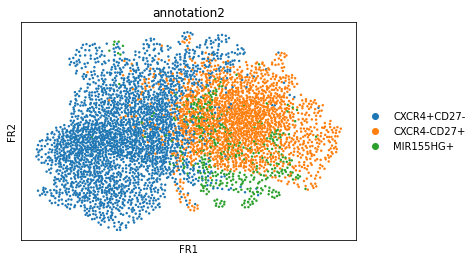

In [9]:
sc.pl.draw_graph(adata, color = "annotation2")

In [13]:
sc.tl.paga(adata, groups='annotation2')

In [14]:
adata.obs.columns

Index(['Exclude_FN', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1',
       'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4',
       'RNA_snn_res.0.5', 'S.Score', 'UMAP_1', 'UMAP_2', 'UMAP_3',
       'annotation', 'annotation2', 'annotation_final', 'donor_id', 'gem_id',
       'hash.ID', 'hashing_snr', 'is_hashed', 'is_richter', 'keep_cells',
       'library_name', 'nCount_RNA', 'nFeature_RNA', 'pct_mt', 'pct_ribosomal',
       'sample_description', 'sample_description_FN', 'sample_id',
       'sampling_time', 'scrublet_doublet_scores',
       'scrublet_doublet_scores_scaled', 'scrublet_predicted_doublet',
       'seurat_clusters', 'subproject', 'time_point', 'tissue'],
      dtype='object')

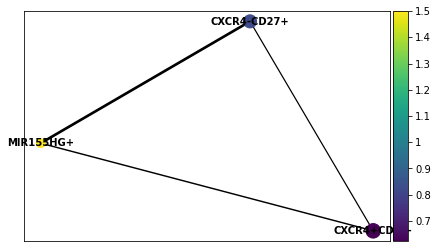

In [19]:
sc.pl.paga(adata, color='MIR155HG')

In [20]:
sc.tl.draw_graph(adata, init_pos='paga')

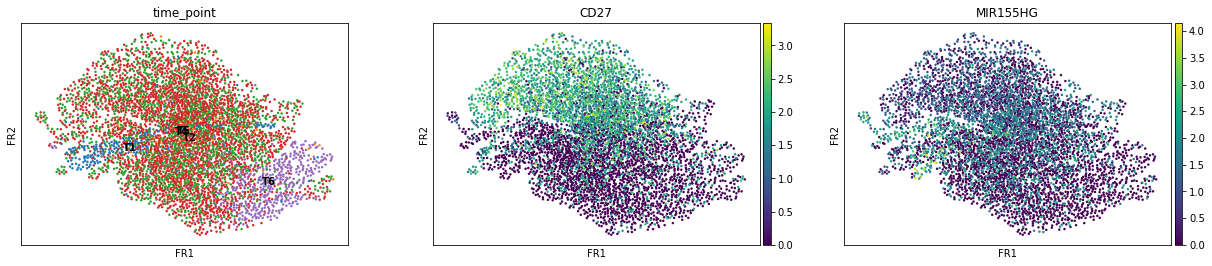

In [22]:
sc.pl.draw_graph(adata, color=["time_point", "CD27", "MIR155HG"], legend_loc='on data')